In [3]:
%matplotlib inline

import os

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from PIL import Image

from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model

/Users/Muriz/.virtualenvs/ml/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 88906316642716806]

In [ ]:
model_new = load_model('test/inceptionv3.hdf5')
model_new.summary()

In [5]:
model_2 = load_model('test/inceptionv3_3.hdf5')

In [6]:
with open('test/classes_230.txt', 'r') as f:
    categories = f.read().splitlines()

In [7]:
target_size = (299, 299) #fixed size for InceptionV3 architecture

def plot_preds(image, preds, top_n):  
    plt.imshow(image)
    plt.axis('off')
    plt.figure()
    
    order = list(reversed(range(top_n)))
    labels = [categories[x] for i, x in enumerate(np.argsort(-probabilities)[:top_n])]
    bar_preds = [-np.sort(-probabilities)[i] for i, x in enumerate(np.argsort(-probabilities)[:top_n])]
    
    plt.barh(order, bar_preds, alpha=0.8, color='g')
    plt.yticks(order, labels, color='g')
    plt.xlabel('Probability', color='g')
    plt.xlim(0, 1.01)
    plt.tight_layout()
    plt.show()

In [8]:
# helper function to load image and return it and input vector
def get_image(path):
    img = image.load_img(path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [71]:
!curl https://static.chefkoch-cdn.de/ck.de/rezepte/90/90634/280470-960x720-pasta-mit-knoblauch-tomaten-shrimps.jpg > ../Desktop/flasktest/simple-keras-rest-api/pred.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  154k  100  154k    0     0   692k      0 --:--:-- --:--:-- --:--:--  695k


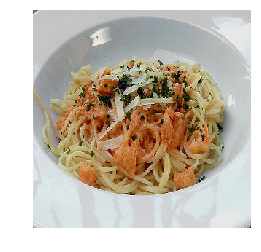

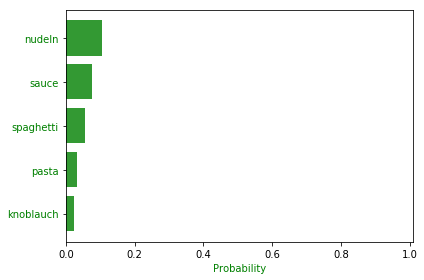

nudeln 10.534151643514633
sauce 7.653104513883591
spaghetti 5.499298125505447
pasta 3.194984421133995
knoblauch 2.367189899086952


In [72]:
img, x = get_image('../Desktop/flasktest/simple-keras-rest-api/pred.jpg')
probabilities = model_2.predict(x)[0]
#print(probabilities)
plot_preds(img, probabilities, 5)
[print(categories[x], (-np.sort(-probabilities)[i]*100)) for i, x in enumerate(np.argsort(-probabilities)[:5])];

In [10]:
def center_crop(x, center_crop_size, **kwargs):
    centerw, centerh = x.shape[0]//2, x.shape[1]//2
    halfw, halfh = center_crop_size[0]//2, center_crop_size[1]//2
    return x[centerw-halfw:centerw+halfw+1,centerh-halfh:centerh+halfh+1, :]

In [11]:
def predict_10_crop(img, ix, top_n=1, plot=False, preprocess=True, debug=False):
    flipped_X = np.fliplr(img)
    crops = [
        img[:299,:299, :], # Upper Left
        img[:299, img.shape[1]-299:, :], # Upper Right
        img[img.shape[0]-299:, :299, :], # Lower Left
        img[img.shape[0]-299:, img.shape[1]-299:, :], # Lower Right
        center_crop(img, (299, 299)),
        
        flipped_X[:299,:299, :],
        flipped_X[:299, flipped_X.shape[1]-299:, :],
        flipped_X[flipped_X.shape[0]-299:, :299, :],
        flipped_X[flipped_X.shape[0]-299:, flipped_X.shape[1]-299:, :],
        center_crop(flipped_X, (299, 299))
    ]
    if preprocess:
        crops = [preprocess_input(x.astype('float32')) for x in crops]

    if plot:
        fig, ax = plt.subplots(2, 5, figsize=(10, 4))
        ax[0][0].imshow(crops[0])
        ax[0][1].imshow(crops[1])
        ax[0][2].imshow(crops[2])
        ax[0][3].imshow(crops[3])
        ax[0][4].imshow(crops[4])
        ax[1][0].imshow(crops[5])
        ax[1][1].imshow(crops[6])
        ax[1][2].imshow(crops[7])
        ax[1][3].imshow(crops[8])
        ax[1][4].imshow(crops[9])
    
    y_pred = model_2.predict(np.array(crops))
    preds = np.argmax(y_pred, axis=1)
    top_n_preds= np.argpartition(y_pred, -top_n)[:,-top_n:]
    if debug:
        print('Top-1 Predicted:', preds)
        print('Top-5 Predicted:', top_n_preds)
        print('True Label:', y_test[ix])
    return preds, top_n_preds

kuchen
cake
schokoladenkuchen
kuchen
nougat_pralinen
kuchen
kuchen
schokoladenkuchen
schokoladenkuchen
nougat_pralinen


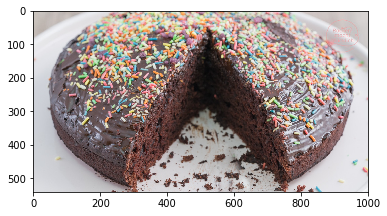

In [36]:
import matplotlib.image as img
import collections
from collections import defaultdict
pic_path = '../Desktop/flasktest/simple-keras-rest-api/pred.jpg'
pic = img.imread(pic_path)
preds = predict_10_crop(np.array(pic), 0)[1]
best_pred = [collections.Counter(pred).most_common(1)[0][0] for pred in preds]
[print(categories[i]) for i in best_pred]
plt.imshow(pic)

In [13]:
import pandas as pd
recipes_csv = pd.read_csv('test/recipes_classify.csv')

In [14]:
recipes_csv.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,recipe_id,recipe_name,year,ingredients,tags,preparation,link,category
0,0,118479,0,6971800010,Caipirinha,2001,"24 cl@Cachaca,8 TL@Zucker,2@Limette,n. B.@Eis","Cocktail,Getränk,Party",Die unbehandelten Limetten vierteln. Im Glas d...,https://www.chefkoch.de/rezepte/6971800010/Cai...,bowle
1,1,276490,1,7971878818,Pangalaktischer Donnergurgler,2000,"6 cl@Wodka,2 cl@Gin,1 cl@Rum,1 Tropfen@Rum,3 c...","Cocktail,Getränk","Die Zutaten, außer der Grenadine, werden zusam...",https://www.chefkoch.de/rezepte/7971878818/Pan...,no_cat
2,2,203769,2,12972895612,Bataten Tofu Pfanne,2002,"400 g@Tofu,600 g@Batate,500 g@Palmfett,2 EL@Öl...","Ernährungskonzepte,Gemüse,Hauptspeise,Vegetarisch",Den trockengetupften Tofu und die geschälten B...,https://www.chefkoch.de/rezepte/12972895612/Ba...,tofu
3,3,153381,3,13972907778,Avocado Basilikum Dip,2002,"2 Bund@Basilikum,1@Zitrone,2@Avocado,150 g@Sch...","Dips,Saucen","Das Basilikum waschen, die Blättchen fein hack...",https://www.chefkoch.de/rezepte/13972907778/Av...,avocado
4,4,134229,4,14972908306,Tomaten-Avocado-Wildreis,2000,"250 g@Reis,4@Tomate,2@Avocado,40 g@Butter,@Krä...","Beilage,gekocht,Gemüse,ReisGetreide,Vegetarisch",Wildreis mit einem Sieb unter lauwarmen Wasser...,https://www.chefkoch.de/rezepte/14972908306/To...,avocado


In [15]:
labels_all = [categories[x] for i, x in enumerate(np.argsort(-probabilities)[:5])]
bar_preds = [-np.sort(-probabilities)[i] for i, x in enumerate(np.argsort(-probabilities)[:5])]

In [24]:
import random
results = []
for label_x in labels_all:
    result_0 = recipes_csv.ix[recipes_csv['category']==label_x.replace('_', ' ')]
    result_0=result_0.take(np.random.permutation(len(result_0))[:1])
    result_0.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'recipe_id', 'tags', 'category'], 1, inplace=True)
    results.append(result_0.to_json(force_ascii=False))

Schokokuchen

In [ ]:
pred_1 = ['Schokokuchen', '4 Ei(er)\n250 g Zucker\n200 ml Öl\n200 ml Orangensaft\n300 g Mehl\n1 Pck. Backpulver\n3 EL Kakaopulver\n200 g Kuvertüre (Zartbitter)\n', 'Den Ofen auf 200° vorheizen. Eier mit Zucker dick-cremig schlagen. Öl und Saft zugeben. Mehl mit Backpulver und Kakao rasch unterrühren. Teig in eine gefettete Kastenform füllen, im Ofen bei 180° (Umluft) 40-45 Minuten backen und abkühlen lassen. Den Kuchen mit der geschmolzenen Zartbitterkuvertüre bestreichen.']

In [ ]:
pred_2 = ['Pasta mit Spinat und Shrimps', '500 g Nudeln, am besten Spiralnudeln\n1 Pck. Spinat, TK, aufgetaut\n1 Becher Schmand\n1 Zitrone(n)\n2 Knoblauchzehe(n)\n200 g Shrimps\nSalz und Pfeffer\nMuskat\nButter', 'Die Nudeln in Salzwasser al dente kochen. In der Zwischenzeit die Shrimps in einem Topf mit Butter und Knoblauch anbraten. Den Spinat und den Schmand dazu geben. Die Zitrone auspressen und den Saft auch dazu geben. Mit Salz, Pfeffer und Muskat abschmecken. Alles mit den Nudeln vermischen und sofort servieren.']

In [ ]:
pred_3 = ['Mojito', '6 cl Rum (Havana Club, 3 Jahre oder Anejo Reserva))\n1/2 TL Rohrzucker, weiß, sehr fein\n1/2 Limette(n), bei wenig Saftgehalt auch eine ganze\nMineralwasser\nMinze, Zweige\nEis in Stücken', 'In ein Cocktailglas Zucker und Sodawasser geben. Limette viertel, Saft über dem Glas ausdrücken, Limettenstücke dazugeben. Mit einem Holzstößel die Limette im Glas nochmals ausdrücken. Gut verrühren. Einige Minzezweige dazugeben, mit dem Holzlöffel die Stiele zerquetschen, dabei nicht die Blätter beschädigen. Das Glas mit grob zerschlagenen Eiswürfeln füllen. Havanna und etwas Sodawasser dazugeben und gut umrühren. Mit Trinkhalm servieren.']

In [70]:
recipes_csv.loc[[23809]].to_json(force_ascii=False)

'{"Unnamed: 0":{"23809":23809},"Unnamed: 0.1":{"23809":210143},"Unnamed: 0.1.1":{"23809":23809},"recipe_id":{"23809":247411098668597},"recipe_name":{"23809":"Chocolate Chips Ice Cream"},"year":{"23809":2004},"ingredients":{"23809":"4@Ei,250\xa0g@Zucker,200\xa0ml@Öl,200\xa0ml@Orangensaft,300\xa0g@Mehl,1\xa0Pck.@Backpulver,3\xa0EL@Kakaopulver,200\xa0g@Kuvertüre "},"tags":{"23809":"Backen,Kuchen"},"preparation":{"23809":"Den Ofen auf 200° vorheizen. Eier mit Zucker dick-cremig schlagen. Öl und Saft zugeben. Mehl mit Backpulver und Kakao rasch unterrühren. Teig in eine gefettete Kastenform füllen, im Ofen bei 180° (Umluft) 40-45 Minuten backen und abkühlen lassen. Den Kuchen mit der geschmolzenen Zartbitterkuvertüre bestreichen."},"link":{"23809":"https:\\/\\/www.chefkoch.de\\/rezepte\\/249081098986207\\/Schokokuchen.html"},"category":{"23809":"cake"}}'

In [25]:
from IPython.core.display import display, HTML

display(HTML(results[0]))

In [26]:
import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [62]:
results[0]

'{"recipe_name":{"240876":"Pralinen mit Karamellganache"},"year":{"240876":2014},"ingredients":{"240876":"2\xa0Beutel@Naturreis,1@Zucchini,1@Zwiebel,1@Paprikaschote,1\\/2\xa0Dose@Mais,200\xa0g@Tomatenmark,1\xa0EL@Tomatenmark,@Öl,evtl.@Salz und Pfeffer,evtl.@Chilipulver"},"preparation":{"240876":"Kochen Sie zuerst den Reis, geben Sie in das Kochwasser eine kräftige Prise Salz. Erhitzen Sie in einer Pfanne Öl (kein Olivenöl, da es die Hitze nicht verträgt und verbrennt). Während der Reis kocht und die Pfanne aufheizt, schneiden Sie die Zucchini, Zwiebel und Paprika in kleine Würfel. Braten Sie die Würfel kurz an und geben anschließend das Tomatenmark, das scharfe Tomatenmark und den Mais dazu und erhitzen das Ganze. Geben Sie zum Schluss noch den gekochten Reis hinzu und rühren nochmal kräftig um - eventuell noch etwas mit Salz, Chili und Pfeffer abschmecken."},"link":{"240876":"https:\\/\\/www.chefkoch.de\\/rezepte\\/2494161392024691\\/Mediterrane-Reispfanne.html"}}'

In [28]:
RenderJSON(results[0])

In [30]:
print (json.dumps(results[0], indent=2))

"{\"recipe_name\":{\"240876\":\"Pralinen mit Karamellganache\"},\"year\":{\"240876\":2014},\"ingredients\":{\"240876\":\"2\u00a0Beutel@Naturreis,1@Zucchini,1@Zwiebel,1@Paprikaschote,1\\/2\u00a0Dose@Mais,200\u00a0g@Tomatenmark,1\u00a0EL@Tomatenmark,@\u00d6l,evtl.@Salz und Pfeffer,evtl.@Chilipulver\"},\"preparation\":{\"240876\":\"Kochen Sie zuerst den Reis, geben Sie in das Kochwasser eine kr\u00e4ftige Prise Salz. Erhitzen Sie in einer Pfanne \u00d6l (kein Oliven\u00f6l, da es die Hitze nicht vertr\u00e4gt und verbrennt). W\u00e4hrend der Reis kocht und die Pfanne aufheizt, schneiden Sie die Zucchini, Zwiebel und Paprika in kleine W\u00fcrfel. Braten Sie die W\u00fcrfel kurz an und geben anschlie\u00dfend das Tomatenmark, das scharfe Tomatenmark und den Mais dazu und erhitzen das Ganze. Geben Sie zum Schluss noch den gekochten Reis hinzu und r\u00fchren nochmal kr\u00e4ftig um - eventuell noch etwas mit Salz, Chili und Pfeffer abschmecken.\"},\"link\":{\"240876\":\"https:\\/\\/www.chef

In [31]:
def pp_json(json_thing, sort=True, indents=4):
    if type(json_thing) is str:
        print(json.dumps(json.loads(json_thing), sort_keys=sort, indent=indents))
    else:
        print(json.dumps(json_thing, sort_keys=sort, indent=indents))
    return None

In [33]:
pp_json(results[0])

{
    "ingredients": {
        "240876": "2\u00a0Beutel@Naturreis,1@Zucchini,1@Zwiebel,1@Paprikaschote,1/2\u00a0Dose@Mais,200\u00a0g@Tomatenmark,1\u00a0EL@Tomatenmark,@\u00d6l,evtl.@Salz und Pfeffer,evtl.@Chilipulver"
    },
    "link": {
        "240876": "https://www.chefkoch.de/rezepte/2494161392024691/Mediterrane-Reispfanne.html"
    },
    "preparation": {
        "240876": "Kochen Sie zuerst den Reis, geben Sie in das Kochwasser eine kr\u00e4ftige Prise Salz. Erhitzen Sie in einer Pfanne \u00d6l (kein Oliven\u00f6l, da es die Hitze nicht vertr\u00e4gt und verbrennt). W\u00e4hrend der Reis kocht und die Pfanne aufheizt, schneiden Sie die Zucchini, Zwiebel und Paprika in kleine W\u00fcrfel. Braten Sie die W\u00fcrfel kurz an und geben anschlie\u00dfend das Tomatenmark, das scharfe Tomatenmark und den Mais dazu und erhitzen das Ganze. Geben Sie zum Schluss noch den gekochten Reis hinzu und r\u00fchren nochmal kr\u00e4ftig um - eventuell noch etwas mit Salz, Chili und Pfeffer abschme

In [ ]:
# THIS IS A TRY WITH EUCLIDIAN DISTANCE

In [11]:
import _pickle as pickle
images_all, pca_features_all = pickle.load(open('test/features_300000_recipes.p', 'rb'), encoding='latin1')

In [12]:
add_string = '../Desktop/Extracting-food-preferences-master/notebooks/input/images'
for index, s in enumerate(images_all):
    final_string = add_string+s[6:]
    images_all[index] = final_string

In [36]:
def get_closest_images(num_results=6):
    distances = [ distance.euclidean(pca_features[10], feat) for feat in pca_features_all ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(images_all[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

In [34]:
import random
from scipy.spatial import distance
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot
from matplotlib.pyplot import imshow

300000


Text(0.5,1,'result images')

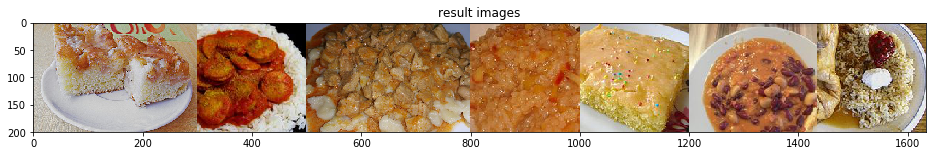

In [35]:
# do a query on a random image
#query_image_idx = int(len(images) * random.random())
#print(images[query_image_idx])
idx_closest = get_closest_images()
#[print(xx) for xx in idx_closest]
#query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
#matplotlib.pyplot.figure(figsize = (5,5))
#imshow(query_image)
#matplotlib.pyplot.title("query image (%d)" % query_image_idx)

# display the resulting images
matplotlib.pyplot.figure(figsize = (16,12))
imshow(results_image)
matplotlib.pyplot.title("result images")

In [13]:
%matplotlib inline
import os
import random
import _pickle as pickle
import numpy as np
import matplotlib.pyplot
from matplotlib.pyplot import imshow
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from sklearn.decomposition import PCA
from scipy.spatial import distance
from tqdm import tqdm

In [14]:
model_vgg_original = keras.applications.VGG16(weights='imagenet', include_top=True)
feat_extractor = Model(inputs=model_vgg_original.input, outputs=model_vgg_original.get_layer("fc2").output)

In [15]:
# get_image will return a handle to the image itself, and a numpy array of its pixels to input the network
def get_image_vgg(path):
    img = image.load_img(path, target_size=model_vgg_original.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [16]:
#features = []
#img, x = get_image_vgg('../Desktop/flasktest/simple-keras-rest-api/pred.jpg');
#feat = feat_extractor.predict(x)[0]
#features.append(feat)

features = []
img, x = get_image_vgg('../Desktop/flasktest/simple-keras-rest-api/pred.jpg');
feat = feat_extractor.predict(x)[0]
for _ in range(1000):
    features.append(feat)

features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)
pca_features = pca.transform(features)

/Users/Muriz/.virtualenvs/ml/lib/python3.6/site-packages/sklearn/decomposition/pca.py:505: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ / total_var.sum()


In [27]:
pca_features[0]

array([ 6.53086812e-04,  4.18367563e-11,  1.53477231e-12, -4.60431693e-12,
       -6.59383659e-12, -2.72848411e-12, -5.00222086e-12,  1.27329258e-11,
        4.54747351e-13, -4.09272616e-12,  5.91171556e-12,  6.82121026e-13,
        1.31876732e-11, -3.63797881e-12, -1.59161573e-12, -4.54747351e-12,
        5.57065505e-12, -9.09494702e-13,  9.09494702e-12,  8.24229573e-12,
        1.96678229e-11,  4.09272616e-12,  1.09139364e-11,  0.00000000e+00,
        1.36424205e-12, -7.27595761e-12,  9.09494702e-13, -1.36424205e-12,
       -2.27373675e-12, -9.09494702e-12, -4.77484718e-12,  1.00044417e-11,
       -4.54747351e-12,  9.09494702e-13,  1.09139364e-11,  0.00000000e+00,
        3.18323146e-12, -5.45696821e-12,  1.36424205e-12, -8.18545232e-12,
       -9.09494702e-12,  2.27373675e-12, -4.54747351e-12, -1.81898940e-12,
       -1.31876732e-11, -1.36424205e-11, -9.77706804e-12,  1.27329258e-11,
       -9.54969437e-12, -3.18323146e-12,  2.61479727e-12, -1.36424205e-12,
        5.03064257e-12, -